# The stereology module

The main purpose of stereology is to extract quantitative information from microscope images relating two-dimensional measures obtained on sections to three-dimensional parameters defining the structure. The aim of stereology is not to reconstruct the 3D geometry of the material (as in tomography) but to estimate  a particular 3D feature. In this case, we aim to approximate the actual (3D) grain size distribution from the apparent (2D) grain size distribution obtained in sections.

GrainSizeTools script includes two stereological methods: 1) the Saltykov, and 2) the two-step methods. Before looking at its functionalities, applications and limitations, let's import the example dataset.

In [1]:
# Load the script first (change the path to GrainSizeTools_script.py accordingly!)
%run C:/Users/marco/Documents/GitHub/GrainSizeTools/grain_size_tools/GrainSizeTools_script.py

module plot imported
module averages imported
module stereology imported
module piezometers imported
module template imported

Welcome to GrainSizeTools script
A free open-source cross-platform script to visualize and characterize grain size
population and estimate differential stress via paleopizometers.

Version: v3.0RC0 (2020-04-23)
Documentation: https://marcoalopez.github.io/GrainSizeTools/

Type get.functions_list() to get a list of the main methods



In [2]:
# Import the example dataset
filepath = 'C:/Users/marco/Documents/GitHub/GrainSizeTools/grain_size_tools/DATA/data_set.txt'
dataset = pd.read_csv(filepath, sep='\t')
dataset['diameters'] = 2 * np.sqrt(dataset['Area'] / np.pi)  # estimate ECD

## The Saltykov method

> **What is it?**
>
> It is a stereological method that approximates the actual grain size distribution from the histogram of the apparent grain size distribution. The method is distribution-free, meaning that no assumption is made upon the type of statistical distribution, making the method very versatile.
>
> **What do I use it for?**
>
> Its main use (in geosciences) is to estimate the volume fraction of a specific range of grain sizes.
>
> **What are its limitations?**
>
> The method presents several limitations for its use in rocks
>
> - It assumes that grains are non-touching spheres uniformly distributed in a matrix (e.g. bubbles within a piece of glass). This never holds for polycrystalline rocks. To apply the method, the grains should be at least approximately equiaxed, which is normally fulfilled in recrystallized grains.
> - Due to the use of the histogram, the number of classes determines the accuracy and success of the method. There is a trade-off here because the smaller the number of classes, the better the numerical stability of the method, but the worse the approximation of the targeted distribution and vice versa. The issue is that no method exists to find an optimal number of classes and this has to be set by the user. The use of the histogram also implies that we cannot obtain a complete description of the grain size distribution.
> - The method lacks a formulation for estimating errors during the unfolding procedure.
>

TODO: explain the details of the method

volume fraction (up to 50 microns) = 41.65 %
bin size = 14.24


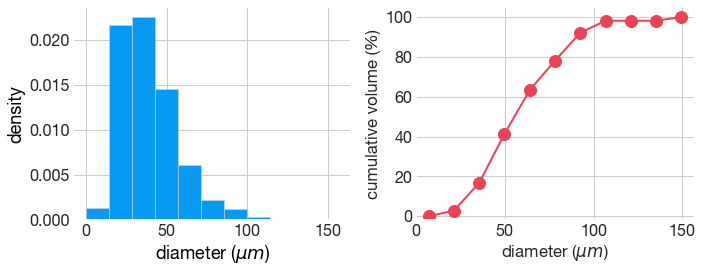

In [3]:
fig1, (ax1, ax2) = stereology.Saltykov(dataset['diameters'], numbins=11, calc_vol=50)

In [4]:
fig1.savefig("saltykov_plot.png", dpi=150)

## The two-step method

> **What is it?**
>
> It is a stereological method that approximates the actual grain size distribution from the histogram of the apparent grain size distribution. The method is distribution-dependent, meaning that it is assumed that the distribution of grain sizes follows a lognormal distribution. The method fit a lognormal distribution on top of the Saltykov method, hence the name two-step method.
>
> **What do I use it for?**
>
> Its main use is to estimate the shape of the lognormal distribution and the volume fraction of a specific range of grain sizes (not yet implemented).
>
> **What are its limitations?**
>
>  The method is partially based on the Saltykov method and therefore inherits some of its limitations. The method however do not require to define a specific number of classes.

PREDICTED OPTIMAL VALUES
Number of classes: 11
MSD (lognormal shape) = 1.63 ± 0.06
Geometric mean (scale) = 36.05 ± 1.27


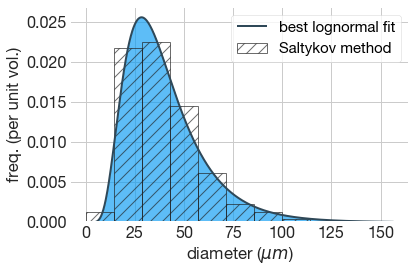

In [5]:
fig2, ax = stereology.calc_shape(dataset['diameters'])

In [6]:
fig2.savefig("2step_plot.png", dpi=150)